## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

**An ecommerce company wants to understand if they should implement a new website page or keep the old page.The company is using A/B Testing for answers.** 


<a id='probability'></a>
#### Part I - Probability


In [1]:
# disable warnings in pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# import all necessary libraries
import statsmodels.api as sms
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read in the ab_data.csv data file and assign it to df . Look at the top few rows.
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Find the number of rows in dataset
total_rows = df.shape[0]
total_rows

294478

**<span style="background-color:yellow">Answer :</span>There are 294478 rows in dataset.**

c. The number of unique users in the dataset.

In [4]:
total_users = df['user_id'].nunique()
total_users

290584

**<span style="background-color:yellow">Answer :</span>There are 290584 unique users.**

d. The proportion of users converted.

In [5]:
# Find the number of users who converted from the whole dataset
users_conv = df[df['converted'] == 1].shape[0]
users_conv

35237

In [6]:
# Find the proportion of users who converted by dividing 'users_conv' from the total number of 'total_users'
prop_conv = users_conv / total_users
prop_conv

0.12126269856564711

**<span style="background-color:yellow">Answer :</span>The proportion of users who converted is (0.12) 12%**

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# Assign the columns and their column values to False to find the number of times new_page
# and treatment don't match. 
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

**<span style="background-color:yellow">Answer :</span>There are 3893 rows where 'treatment' and 'new_page' do not match.**

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**<span style="background-color:yellow">Answer :</span>There are NO missing values.**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Find the number or rows where 'treatment' in 'group' column matches 'new_page' in 'landing_page' column
df2 = df[(((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True) | \
         (((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == True)]
len(df2)

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[(((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False) | \
   (((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False)].shape[0]

/Users/debbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [11]:
# Display first 5 rows of df2 which contains 290585 rows
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


**<span style="background-color:yellow">Answer :</span>The rows , where 'treatment' and 'new_page' do not match up or 'control' and 'old_page' do not match up are removed to create new dataframe 'df2'**

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2_users = df['user_id'].nunique()
df2_users

290584

**<span style="background-color:yellow">Answer :</span>There are 290584 unique users in df2 (has 290585 rows) which implies that there is one duplicate user_id** 

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Find the user_id repeated in df2 
df2_dup_row = df2[df2.duplicated(['user_id'])]
df2_dup_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**<span style="background-color:yellow">Answer :</span>Row with 'user_id' value of '773192' is a duplicate.**

c. What is the row information for the repeat **user_id**? 

In [14]:
# Find the two rows that contain the duplicate
df2_dup_user = df2[df2['user_id'] == 773192]
df2_dup_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**<span style="background-color:yellow">Answer :</span>Row with index numbers '1899' and '2893' have same 'user_id'.**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# drop the duplicate rows in the 'user_id' column and keep the first and keep dataframe as df2
df2.drop_duplicates(subset ="user_id",keep = 'first', inplace = True)                 

/Users/debbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# Check that the row which contains the duplicate of 'user_id' equal to 773192 is dropped 
df2_dup_user = df2[df2['user_id'] == 773192]
df2_dup_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [17]:
# Find the total rows of df2 which should equal to 290584 
len(df2)

290584

In [18]:
df2.tail(3)

,user_id,timestamp,group,landing_page,converted
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [19]:
# reset the index of df2
df2 = df2.reset_index(drop=True)

In [20]:
# check that index was reset
df2.tail(3)

,user_id,timestamp,group,landing_page,converted
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0
290583,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


**<span style="background-color:yellow">Answer :</span>Cleaned dataframe 'df2' has 290584 rows.**

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# The number of conversions regardless of page 
df2_conv = df2[df2['converted'] == 1]
conv2_rows = df2_conv.shape[0]
conv2_rows

34753

In [22]:
prob_conv = conv2_rows / df2_users
prob_conv

0.11959708724499628

**<span style="background-color:yellow">Answer :</span>The probability of a user converting regardless of page they receive is 0.1196 (12%).**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# Find number of users in the 'control' group
df2_control = df2[df2['group'] == 'control']
control_num = len(df2_control)
control_num

145274

In [24]:
# Out of the individuals in the 'control' group find the number of users that converted.
df2_control_conv = df2_control[df2_control['converted'] == 1]
control_conv_num = len(df2_control_conv)
control_conv_num

17489

In [25]:
# Find probability that the 'users' converted given they are in the 'control' group
prob_control_conv = control_conv_num / control_num
prob_control_conv

0.1203863045004612

**<span style="background-color:yellow">Answer :</span>Given that user is in 'control' group the probability they converted is (0.1204) 12.04%.**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
# Find number of users in the 'treatment' group
df2_treatment = df2[df2['group'] == 'treatment']
treatment_num = len(df2_treatment)
treatment_num

145310

In [27]:
# Out of the individuals in the 'treatment' group find the number of users that converted.
df2_treatment_conv = df2_treatment[df2_treatment['converted'] == 1]
treatment_conv_num = len(df2_treatment_conv)
treatment_conv_num

17264

In [28]:
# Find probability that the 'users' converted given they are in the 'treatment' group
prob_treatment_conv = treatment_conv_num / treatment_num
prob_treatment_conv

0.11880806551510564

**<span style="background-color:yellow">Answer :</span>Given that user is in 'treatment' group the probability they converted is (0.1188) 11.88%.**

d. What is the probability that an individual received the new page?

In [29]:
# Find the number of 'users' whose 'landing_page' is the 'new_page'
df2_newpage = df2[df2['landing_page'] == 'new_page']
newpage_num = len(df2_newpage)
newpage_num

145310

In [30]:
# Find the probability that an individual received the 'new_page' given all users
prob_newpage = newpage_num / df2_users
prob_newpage

0.5000619442226688

**<span style="background-color:yellow">Answer :</span>Given all users, the probability that and individual use the 'new_page' is 0.5000 (50%).**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**<span style="background-color:yellow">Conclusion :</span>**There is **no** sufficient evidence to conclude that the **new treatment** page leads to more **conversions**. The probability that a user in the **control** group has **converted** is **12.04%** where the probability that a user in the **treatment** group that has **converted** is **11.88%**. With a large dataset of **290584** rows there is **no** significant difference in probabilities.   

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**<span style="background-color:yellow">Answer :</span>**  

**NULL HYPOTHESIS : *p-new - p-old <= 0***<br />
**ALTERNATIVE HYPOTHESIS : *p-new - p-old > 0***  
<br />
**ALSO WRITTEN AS :**<br /><br />
**HO : *p-new - p-old <= 0***<br />
**HA : *p-new - p-old > 0***
  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [31]:
# State the probability of the conversion rate regardless of the page they receive
rate_new_null = prob_conv
rate_new_null

0.11959708724499628

**<span style="background-color:yellow">Answer :</span>Under the null, p-new and p-old have success rates equal to the converted success reate regardless of page. The calculated result is 11.96%.**

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [32]:
# Under the null the conversion rate of the old is equal to the new conversion rate
rate_old_null = rate_new_null
rate_old_null

0.11959708724499628

**<span style="background-color:yellow">Answer :</span>Under the null, p-new is equal to p-old which is 11.96%.**

c. What is $n_{new}$, the number of individuals in the treatment group?

In [33]:
# The number of individuals in the treatment group
num_new = treatment_num
num_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [34]:
# The number of individuals in the control group
num_old = control_num
num_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
# create array of new_page
new_array = df2.converted[df2['landing_page'] == 'new_page']

In [36]:
# Simulate n-new transactions
#Since the probability that a user received the new page is 
# 50% than use a binomial distribution to generate an array of 0 and 1's .
new_page_converted = np.random.binomial(new_array, rate_new_null)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**<span style="background-color:yellow">Answer :</span>Use binomial distribution for simulated new_page transactions since there is 50% probability that user landed on 'new_page'.**

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
# create array of old_page
old_array = df2.converted[df2['landing_page'] == 'old_page']

In [43]:
# store distribution in old_page_converted
old_page_converted = np.random.binomial(old_array, rate_old_null)
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

**<span style="background-color:yellow">Answer :</span>Use binomial distribution for simulated old_page transactions since there is 50% probability that user landed on 'old_page'.**

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [44]:
# Find the mean of new_page_converted. 
p_new = new_page_converted.mean()
p_new

0.01329571261441057

In [45]:
# find the mean of old_page_converted
p_old = old_page_converted.mean()
p_old

0.01416633396203037

In [46]:
# calculate difference of p-new and p-old
diffs = p_new - p_old
diffs

-0.0008706213476197995

**<span style="background-color:yellow">Answer :</span>The p_new and p_old are calculated by taking the mean of new_page_converted and old_page_converted. Then the difference is calculated. This will be used as the observation difference under the null.**

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [47]:
# the new_converted_simulation calculated will be genarated using the numpy binomial function simulated 10,000 times
# where num_new is the trial size (number of users in treatment group) of 145310, rate_new_null is 0.1196 which 
# is the conversion rate under new page.
new_converted_simulation = np.random.binomial(num_new, rate_new_null,10000)/num_new
new_converted_simulation

array([0.12123047, 0.12090014, 0.12048723, ..., 0.1178859 , 0.12054229,
       0.12081756])

In [48]:
# the old_converted_simulation calculated will be genarated using the numpy binomial function simulated 10,000 times
# where num_old is the trial size (number of users in control group) of 145274, rate_new_null is 0.1196 which 
# is the conversion rate under old page under NULL hypothesis.
old_converted_simulation = np.random.binomial(num_old, rate_old_null,10000)/num_old
old_converted_simulation

array([0.11958781, 0.11903713, 0.11843826, ..., 0.1195947 , 0.11960846,
       0.11903713])

In [49]:
# under NULL hypothesis probability differences is calculated using new_converted and old_converted simulations
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([ 0.00164266,  0.00186301,  0.00204897, ..., -0.0017088 ,
        0.00093382,  0.00178043])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

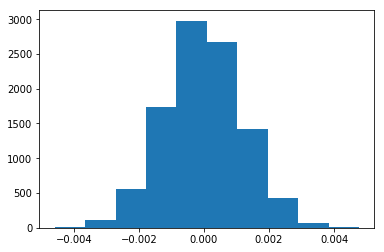

In [50]:
# Plot a histogram of p_diffs
plt.hist(p_diffs);

In [51]:
# Find 95% confidence interval for p_diffs
np.percentile(p_diffs,2.5), np.percentile(p_diffs, 97.5)

(-0.0023352788598128256, 0.0023792366680895883)

**<span style="background-color:yellow">Answer :</span>The histogram plot of p_diffs shows that most of the data is centered around 0 as expected since we are observing data under the null.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [54]:
# find the actual observed differences from the treatment group and the control group in the dataset 
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

In [55]:
# The proportion of p_diffs simulated greater than the mean of the observed differences in the actual dataset 
# is p-value
(p_diffs > obs_diff).mean()

0.9085

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**<span style="background-color:yellow">Answer :</span>The p-value in this case is 0.9085. The p-value is the average of all the p_diffs that are greater than the average of the observed difference of the conversion rate in treatment and the conversion rate in control. 
In other words, the p-value is the probablily of finding 
the more extreme result when Null hypothesis is true.   
With 95% confidence interval, alpha is 0.05. Since p-value > 0.05, we will NOT reject null hypothesis (that is, we will ACCEPT null hypothesis that there is not a significant difference).  
The plot shown below shows the observed difference.**

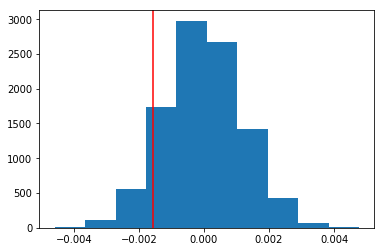

In [56]:
# Plot a histogram of p_diffs
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red')

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [57]:
# Find the number of users that land on the 'old_page'
df2_old = df2[df2['landing_page'] == 'old_page']
n_old = len(df2_old)
n_old

145274

In [58]:
# Out of all users that land on the 'old_page' find the number of users that converted.
df2_convert_old = df2_old[df2_old['converted'] == 1]
convert_old = len(df2_convert_old)
convert_old

17489

In [59]:
# Find the number of users that land on the 'new_page'
df2_new = df2[df2['landing_page'] == 'new_page']
n_new = len(df2_new)
n_new

145310

In [60]:
# Out of all the individuals that land on the 'new_page' find the number of users that converted.
df2_convert_new = df2_new[df2_new['converted'] == 1]
convert_new = len(df2_convert_new)
convert_new

17264

In [61]:
# find propotion of conversion when landing on old_page
prop_old = convert_old / n_old
prop_old

0.1203863045004612

In [62]:
# find propotion of conversion when landing on new_page
prop_new = convert_new / n_new
prop_new

0.11880806551510564

In [63]:
# find difference between prop_new and prop_old
prop_diff = prop_new - prop_old
prop_diff 

-0.0015782389853555567

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [65]:

#count  – the number of successes in nobs trials. 
#nobs - the number of trials or observations
convert_old = df2.query('landing_page == "old_page"').converted.sum() #sum all converted values where landing is old
convert_new = df2.query('landing_page == "new_page"').converted.sum() #sum all converted values where landing on new
n_old = df2.query('landing_page == "old_page"').shape[0] # count number of old_page
n_new = df2.query('landing_page == "new_page"').shape[0] # count number of new_page
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


In [66]:
import statsmodels.api as sm  # import statsmodels library
# us statsmodels.stats.proportion.proportions_ztest(count, nobs,  alternative='larger') to get p-value and z_score
# alternative = 'larger' for one-sided test
#z-score is the value representing the number of standard deviations away from the mean
z_score, p_value = sms.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new,n_old]), \
                                              alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [68]:
# print p-value to 3 decimal places
print('{0:0.3f}'.format(p_value))

0.905


In [69]:
# print z-score to 3 decimal places
print('{0:0.3f}'.format(z_score))

-1.311


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**<span style="background-color:yellow">Conclusion: </span>**
**The conversion rates of p-new (conversion rate when user lands on new_page) and p-old (conversion rate when user lands on old_page) is tested to check if they are statistically significant.**<br />

**Null Hypothesis : p-new - p-old <= 0**<br />
**Alternative Hypothesis : p-new - p-old > 0**<br />

**At 95% confidence interval, that is, alpha of 0.05 , we fail to reject Null Hypothesis (accept Null Hypothesis) since p-value (0.905) is greater than alpha. Thus, there is strong evidence that the old page is better or just as good as new page when it comes to conversion.**<br /> 
**The z-score is the number of standard deviations from the observed data point and the mean.**<br />
**A z-score of -1.311 has a p-value of 0.905. The p-value generated by proportions_ztest is equivalent to the p-value generated by the binomial simulations above.** 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**For categorical data, Logistic regression is used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [71]:
# Display the first few rows of the dataframe
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [73]:
# make copy of df2 and use for regression
df_reg = df2.copy()
df_reg.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [74]:
# create two columns where 'ab_page' has dummy values generated from the 'group' column
df_reg[['control','ab_page']] = pd.get_dummies(df_reg['group'])

In [75]:
# create an intercept column
df_reg['intercept'] = 1

In [76]:
df_reg.head(5)

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [78]:
# When creating columns that have dummy values drop one column which was created
df_reg = df_reg.drop(['control'], axis=1)

In [79]:
df_reg.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [81]:
# Create a logistic regression model where converted is the target variable and the other variables are the 
# independent variables. 
logit_mod = sms.Logit(df_reg['converted'], df_reg[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:56:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**<span style="background-color:yellow">Conclusion: </span>**


**The p-value derived from the logistic regression of the 'ab_page' independent variable is 0.19 which is greater than 0.05 so we FAIL to reject the Null Hypothesis ( Accept the Null Hypothesis). The p_value from PART II is 0.90 . The p-value from the regression test is from a two-sided test while that from the sms.stats.proportions_ztest function is a one-sided test. Also note, that 0.90 = 1 - (0.19 / 2)**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**<span style="background-color:yellow">Answer: </span>**

**You can also add gender of 'male' and 'female' to see if this might influence whether an individual converts or not. Since this is an ecommerce website you can check if females are likely to convert more with the new_page than with the old_page. The more independent variables or factors you introduce in your regression model the more you run the risk of multicollinearity**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [83]:
# read the countries data set
df_country = pd.read_csv('countries.csv')
df_country.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
# find number of rows and columns
df_country.shape[0]

290584

In [87]:
# find number of rows for df_reg
df_reg.shape[0]

290584

In [85]:
# find the count of any null values
df_country.isnull().sum()

user_id    0
country    0
dtype: int64

In [86]:
# find the unique values for country
df_country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [94]:
# join the df2 and df_country datasets on 'user_id' and create a new dataframe
df_new = df_reg.join(df_country.set_index('user_id'), on='user_id')
df_new.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US


In [95]:
# find the number of rows and columns of new dataframe
df_new.shape[0]

290584

In [96]:
# create dataframe with columns 'US', 'UK', and 'CA' with dummy values from 'country' column
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
df_new.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1


In [97]:
# Fit the logistic regression model using converted as dependent variable and 'ab_page','US'and 'UK' as independent
# variables ( drop the CA column)
logit2_mod = sms.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US','UK']])
results2 = logit2_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [98]:
# produce the summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        19:32:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [99]:
# create columns where both country and treatment are both '1' which indicates that they are both present.
# these new columns contain interaction values of country and treatment 
df_new['us_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['uk_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,US,UK,CA,us_ab_page,uk_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0


In [100]:
# regression model on converted (dependent variable) and independent variables (ab_page, US, us_ab_page, UK, 
# and uk_ab_page). 
logit3_mod = sms.Logit(df_new['converted'], df_new[['intercept', 'ab_page','US','us_ab_page','UK' ,'uk_ab_page']])
results3 = logit3_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [101]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        19:42:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
us_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
uk_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**<span style="background-color:yellow">Conclusion: </span>**  

**The p_values for the independent variables of ab_page, US, us_ab_page, UK, uk_ab_page are all greater than 0.05 thus we will accept the null hypothesis of a two-tailed test where converted averages are the same.**




## <span style="background-color:yellow">Final Conclusion</span>  

**A/B Testing is used for this particular e-commerce website to see if a new page will increase the probability that the user will convert to a paying status which will generate more income. The null hypothesis is stated where the old page is better or just as good as the new page for the conversion rate. The alternative hypothesis is that the new page is better. The methods used are :**  

**1. 10000 simulations of conversion rate differences between old page and new page under the null and then calculating the p-value. The result is to accept the null hypothesis that the old page is better or just as good as the new page for conversion rate of the website.**  

**2. Regression approach which is helpful in adding more variables to see if variables changes the hypothesis results of a two-side test. Regression tests were performed on the treatment and then on the countries and their interaction with the treatment. All p-values from the regression tests are greater than 0.05 thus we accept the null hypothesis that treatments and countries are not statistically significant for the conversion rate.** 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])